<img src="images/The-Construct-logo-new.png" />
<div><h1 class="text-center">PRESENTS</h1></div>
<img src="images/OpenClass185.jpeg" />

<div class="bg-primary text-center"> - Summary - </div>

In this Open Class, you will learn how to run and configure Foxglove, an open-source visualization and debugging tool for robotics. You'll discover how to create a web-based control center for your robot, enabling you to monitor and visualize live or recorded data, including sensor inputs like images, point clouds, and more. 🤖🔍

You will learn:

What is Foxglove and how it can enhance your robotics development workflow
How to run and configure Foxglove for your robot
How to create a web-based control center for your robot
Throughout the training, you'll be working with the TurtleBot3 robot. 🤖

This rosject has been created by Thisas Ranhiru and Alberto Ezquerro from The Construct.

<div class="bg-primary text-center"> - End of Summary - </div>

<div> 
    <h1 class="text-center"> 
    <span class="text-primary">Get Started 🚀</span> &nbsp; <span class="">Let's launch the TurtleBot3 simulation</span> 
    </h1> 
</div>

To begin, we'll launch the TurtleBot3 simulation and Nav2 in the turtlebot3 world.

Run the following commands:

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 1 </span>

In [ ]:
source ~/ros2_ws/install/setup.bash
ros2 launch turtlebot3_gazebo turtlebot3_world.launch.py

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 2 </span>

In [ ]:
source ~/ros2_ws/install/setup.bash
ros2 launch turtlebot3_navigation2 navigation2.launch.py use_sim_time:=True map:=$HOME/map.yaml

You should now see the TurtleBot3 simulation running in Gazebo:

<img src="images/turtlebot_world.png" width="800" /> 

You'll also see RViz open:

<img src="images/rviz_blank.png" width="800" /> 

From RViz, set a 2D Pose Estimate to initialize the localization system. 

<img src="images/pose_estimate.png" width="200" /> 

<img src="images/map_rviz.png" width="800" /> 

<div> 
    <h1 class="text-center"> <span class="text-primary">What is Foxglove? 🦊</span> &nbsp; <span class="">Introducing Foxglove, the open-source visualization and debugging tool</span> 
    </h1> 
</div>

Foxglove is an open-source visualization and debugging tool designed specifically for robotics applications. It enables users to visualize live or previously recorded data, making it easier to inspect sensor inputs such as images, point clouds, and more.

With Foxglove, you can create a web-based control center for your robot, allowing you to monitor and interact with your robot's data from anywhere with an internet connection. 🌐

<div> 
    <h1 class="text-center"> 
    <span class="text-primary">Running Foxglove 🏃</span> &nbsp; <span class="">Setting up Foxglove for your robot</span> 
    </h1> 
</div>


To run Foxglove, we'll need to install the foxglove-bridge package, which acts as a bridge between ROS and Foxglove.

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 3 </span>


In [ ]:
sudo apt-get update
sudo apt-get install ros-$ROS_DISTRO-foxglove-bridge

Next, we'll create a new package to house our launch files:

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 3 </span>

In [ ]:
cd ~/ros2_ws/src
ros2 pkg create turtlebot_bringup
cd ~/ros2_ws/src/turtlebot_bringup
mkdir launch

Update the `CMakeLists.txt` file in the turtlebot_bringup package to include the launch directory:

<span class="badge badge-pill badge-primary"> <i class="fa fa-file"></i> &nbsp; CMakeLists.txt </span>

```cmake
cmake_minimum_required(VERSION 3.8)
project(turtlebot_bringup)

if(CMAKE_COMPILER_IS_GNUCXX OR CMAKE_CXX_COMPILER_ID MATCHES "Clang")
add_compile_options(-Wall -Wextra -Wpedantic)
endif()

# find dependencies

find_package(ament_cmake REQUIRED)

# uncomment the following section in order to fill in

# further dependencies manually.

# find_package(<dependency> REQUIRED)

if(BUILD_TESTING)
find_package(ament_lint_auto REQUIRED)

# the following line skips the linter which checks for copyrights

# comment the line when a copyright and license is added to all source files

set(ament_cmake_copyright_FOUND TRUE)

# the following line skips cpplint (only works in a git repo)

# comment the line when this package is in a git repo and when

# a copyright and license is added to all source files

set(ament_cmake_cpplint_FOUND TRUE)
ament_lint_auto_find_test_dependencies()
endif()

# Install launch files.

install(DIRECTORY
launch
DESTINATION share/${PROJECT_NAME}/
)

ament_package()
```

<img src="images/cmake.png" width="800" />

Create a new launch file named turtlebot.launch in the launch directory:

<span class="badge badge-pill badge-primary"> <i class="fa fa-file"></i> &nbsp; turtlebot.launch </span>


```xml
<launch>
  <!-- Including in another launch file -->
  <include file="$(find-pkg-share foxglove_bridge)/launch/foxglove_bridge_launch.xml">
    <arg name="port" value="9090"/>
    <!-- ... other arguments ... -->
  </include>
</launch>
```

<img src="images/launch.png" width="800" />


This launch file will start the Foxglove bridge, allowing Foxglove to connect to your ROS system.

Build the package:

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 3 </span>


In [ ]:
cd ~/ros2_ws
colcon build --packages-select turtlebot_bringup

Source the setup files and launch the turtlebot.launch file:

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 3 </span>

In [ ]:
source ~/ros2_ws/install/setup.bash
ros2 launch turtlebot_bringup turtlebot.launch

<div> 
    <h1 class="text-center"> <span class="text-primary">Connecting to Foxglove 🔗</span> &nbsp; <span class="">Establishing a connection between Foxglove and your robot</span> 
    </h1> 
</div>

To connect Foxglove to your robot, you'll need to obtain the ROS bridge address. Run the following command in a new terminal:

<span class="badge badge-pill badge-primary"> <i class="fa fa-play"></i> &nbsp; Execute in Terminal 4 </span>


In [ ]:
rosbridge_address

This will output a URL that you'll use to connect Foxglove to your ROS system.

Next, open the Foxglove application in your web browser by visiting https://foxglove.dev.


<img src="images/foxglove_site.png" width="800" />


Click the "Get started" button in the top-right corner or the center of the page.


<img src="images/get_started.png" width="300" />


If you haven't already, create a Foxglove account or sign in with your existing account.

<img src="images/foxglove_init.png" width="800" />


Once signed in, click the "Open Connection" button.


<img src="images/open_connection.png" width="500" />


In the prompt that appears, paste the ROS bridge address you obtained earlier and click "Open".


<img src="images/connection_setup.png" width="800" />


You should now see the Foxglove interface with a default layout.

<div> 
    <h1 class="text-center"> 
    <span class="text-primary">Configuring Foxglove 🛠️</span> &nbsp; <span class="">Customizing Foxglove for your robot</span> 
    </h1> 
</div>

The default layout in Foxglove may be empty or contain basic panels. To customize the layout, you can create a new one by clicking the "Layout" menu and selecting "New Layout".


<img src="images/foxglove_blank.png" width="800" />


Each panel in Foxglove can be modified to display different data or visualizations. To modify a panel, click the three-dot menu in the top-right corner of the panel and select the desired option.


<img src="images/triple_dot.png" width="600" />


You can also split a panel into multiple panels by clicking the split button in the top-left corner of the panel.


<img src="images/pannel_settings.png" width="800" />


To configure a panel's settings, click the gear icon in the top-right corner of the panel. This will open the panel options on the left side of the interface.


<img src="images/add_panel.png" width="600" />


To add new panels, click the "Add Panel" button in the top-left corner of the interface.


<img src="images/display_frame.png" width="500" />


## Add Laserscan & Robot Model to 3D View

https://docs.foxglove.dev/docs/visualization/panels/3d#laser-scan<br/>
https://docs.foxglove.dev/docs/visualization/panels/3d#add-urdf

For the TurtleBot3 simulation, we'll focus on the 3D panel in the center, which displays the robot's position and orientation in the environment. By default, the display frame is set to base_link, but you can change it to map or any other frame as needed.


<img src="images/topics.png" width="500" />


To visualize sensor data, expand the "Topics" section and click the eye icon next to the desired topics, such as /scan for the laser scan and /robot_description for the robot model.

You might find it easier to switch to light mode as done for the rest of the guide due to the laserscan being harder to see in dark mode.


<img src="images/topic_settings.png" width="400" />

You can adjust the size of the laser scan by modifying the panel settings for the respective topic.

<img src="images/scan_display.png" width="800" />

## Add Camera 🎥

https://docs.foxglove.dev/docs/visualization/panels/image

To view the robot's camera feed, add an "Image" panel from the "Add Panel" menu.

<img src="images/image_view.png" width="800" />

In the panel settings, add the camera topic (e.g., /camera/rgb/image_raw) and the calibration topic (e.g., /camera/rgb/camera_info). You should now see the live camera feed in the image panel.


<img src="images/camera_settings.png" width="500" /> 


<img src="images/scan_final.png" width="800" />


## Publish to Map 📌

https://docs.foxglove.dev/docs/visualization/panels/3d#publish

If you're using a navigation stack like Nav2, you can configure the 3D view to publish goal positions by changing the "Publish" settings. This will allow you to set navigation goals by clicking in the 3D view.


<img src="images/change_nav_topic.png" width="400" /> 
<img src="images/publish_tool.png" width="400" /> 
<img src="images/publish_viz.png" width="800" />

To see the map you can add the `/map` topic from the topics menu. 

I also excourage you to see the other topics like the plan topic to see the path planner in action as I've done below. 

Sometimes foxglove gets stuck, so you may need to reload foxglove client. 

<img src="images/nav_final.png" width="800" />

## Teleop from foxglove 🕹️

https://docs.foxglove.dev/docs/visualization/panels/teleop/

To control the robot's movement, add a "Teleop" panel from the "Add Panel" menu and configure it to publish to the /cmd_vel topic.


<img src="images/add_teleop.png" width="600" /> 
<img src="images/teleop_blank.png" width="800" />
<img src="images/add_cmd_vel_topic.png" width="400" /> 
<img src="images/cmd_vel.png" width="800" />

You can now use the the on-screen controls to move the robot. Adjust the speed using the panel options if needed.


## Topic Graph 🕸️

https://docs.foxglove.dev/docs/visualization/panels/topic-graph

To visualize the active topics, nodes, and their connections, add a "Topic Graph" panel from the "Add Panel" menu.


<img src="images/add_topic_graph.png" width="600" /> 
<img src="images/topic_graph_expanded.png" width="800" />

You can filter the displayed topics and nodes to simplify the graph view.


<img src="images/filter_topic_graph.png" width="500" /> 
<img src="images/filtered_topic_graph.png" width="800" />

## Plot 📈

https://docs.foxglove.dev/docs/visualization/panels/plot

For tasks like PID tuning or closed-loop behavior analysis, add a "Plot" panel from the "Add Panel" menu.


<img src="images/add_plot.png" width="600" />


Configure the plot panel to display the desired topics and data by adjusting the panel settings.


<img src="images/plot.png" width="800" /> 


Once you've customized Foxglove to your liking, you can save the layout and share it with others by exporting the configuration.


<img src="images/save_and_export.png" width="500" /> 


This introduction covers the basic usage of Foxglove for visualizing and monitoring your robot. Foxglove offers many more features and capabilities that you can explore in the official documentation: https://docs.foxglove.dev/docs/visualization/introduction


<img src="images/foxglove.png" width="800" /> 


<div> <h1 class="text-center"> <span class="text-primary">Share Your Work 📨</span> &nbsp; <span class="">Let's see how you're using Foxglove!</span> </h1> 
</div>


We love seeing how our students apply the skills they've learned, so please share your work using Foxglove on social media and be sure to tag us! 🎉



[Twitter (X) | @_TheConstruct_](https://twitter.com/_theconstruct_) 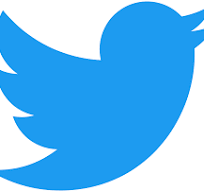

[Facebook | The Construct ](https://www.facebook.com/theconstructsim) 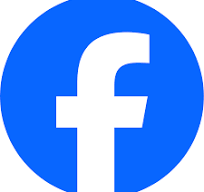
